##Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Training Inputs and targets

In [54]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

##Single-Layer Perceptron Implementation

In [55]:
class SingleLayerPerceptron:
    def __init__(self, learning_rate=0.1, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = np.random.rand(2)
        self.bias = np.random.rand(1)

    def activation_step_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.activation_step_function(weighted_sum)

    def train(self, X, y):
        errors = []
        for _ in range(self.n_iterations):
            error_sum = 0
            for i in range(len(X)):
                # Forward pass
                prediction = self.predict(X[i])

                # Calculate error
                error = y[i] - prediction
                error_sum += abs(error)

                # Update weights and bias
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

            errors.append(error_sum)
        return errors

##Training the single-layer perceptron

In [62]:
perceptron = SingleLayerPerceptron(learning_rate=0.1, n_iterations=1000000)
errors = perceptron.train(X, y)

print(f"Final weights: {perceptron.weights}")
print(f"Final bias: {perceptron.bias}")

correct_prediction = 0
print("\nFinal predictions:")
for i in range(len(X)):
    prediction = perceptron.predict(X[i])
    print(f"Input: {X[i]}, Target: {y[i]}, Prediction: {prediction}")
    if prediction==y[i]:
      correct_prediction += 1

print(f"Accuracy: {correct_prediction*100/4.0}%")

Final weights: [-0.07032858 -0.05031234]
Final bias: [0.06285946]

Final predictions:
Input: [0 0], Target: 0, Prediction: 1
Input: [0 1], Target: 1, Prediction: 1
Input: [1 0], Target: 1, Prediction: 0
Input: [1 1], Target: 0, Prediction: 0
Accuracy: 50.0%


##XOR prediction of input = [0.1 , 0.9]

In [63]:
test_input = np.array([0.1, 0.9])
print(f"\nPrediction for X=0.1, Y=0.9: {perceptron.predict(test_input)}")


Prediction for X=0.1, Y=0.9: 1


##Visualization of decision boundary


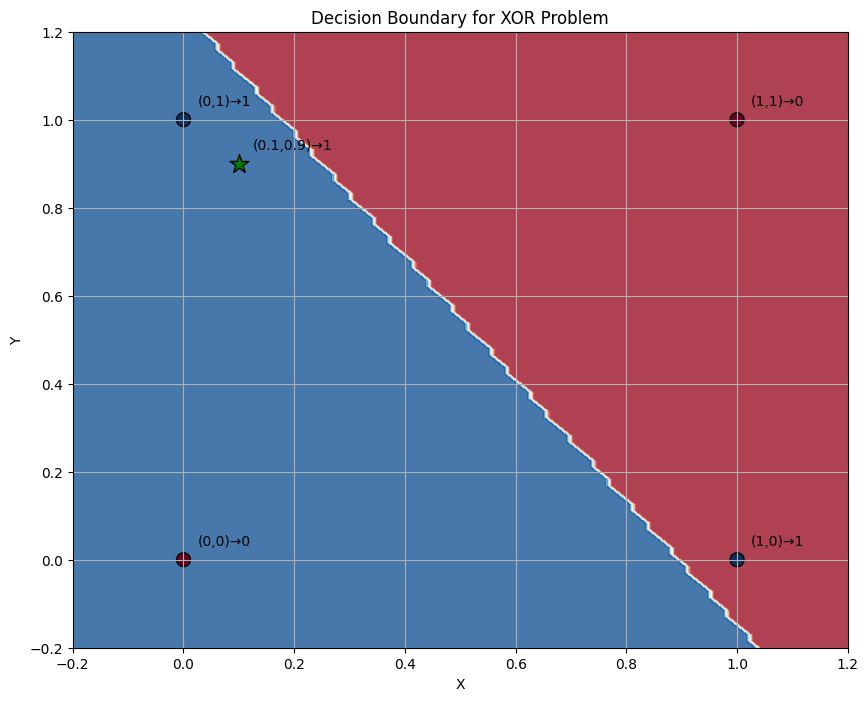

In [64]:
def plot_decision_boundary():
    # Generate a grid of points
    x_min, x_max = -0.2, 1.2
    y_min, y_max = -0.2, 1.2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = np.array([[perceptron.predict([x, y]) for x, y in zip(xi, yi)]
                  for xi, yi in zip(xx, yy)])

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)

    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100, cmap=plt.cm.RdBu)
    plt.scatter([0.1], [0.9], c='green', edgecolors='k', marker='*', s=200)

    for i, (x_val, y_val) in enumerate(X):
        plt.annotate(f'({x_val},{y_val})→{y[i]}',
                    (x_val, y_val),
                    xytext=(10, 10),
                    textcoords='offset points')

    plt.annotate(f'(0.1,0.9)→{perceptron.predict(test_input)}',
                (0.1, 0.9),
                xytext=(10, 10),
                textcoords='offset points')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Decision Boundary for XOR Problem')
    plt.grid(True)
    plt.show()

plot_decision_boundary()

## **Optimal Solution**

# Using pre-defined weights -> w1, w2 & bias instead of random weights & bias

In [65]:
optimal_weights = np.array([1.0, 1.0])
optimal_bias = -0.5

## Single-Layer Perceptron

In [66]:
def optimal_predict(inputs, weights, bias):
    z = np.dot(inputs, weights) + bias
    output = 1 if z >= 0 else 0
    return z, output

## Optimal solution

In [67]:
correct_optimal_count = 0
for i, x_input in enumerate(X):
    target_output = y[i]
    z_val, predicted_output = optimal_predict(x_input, optimal_weights, optimal_bias)
    is_correct = (predicted_output == target_output)
    if is_correct:
        correct_optimal_count += 1
    print(f"    Input: {x_input}, z = {z_val:.2f}, Predicted Output: {predicted_output}, Target: {target_output}, Correct: {is_correct}")
print(f"Optimal/Maximum Accuracy on XOR: {correct_optimal_count / len(X) * 100:.2f}%\n")

    Input: [0 0], z = -0.50, Predicted Output: 0, Target: 0, Correct: True
    Input: [0 1], z = 0.50, Predicted Output: 1, Target: 1, Correct: True
    Input: [1 0], z = 0.50, Predicted Output: 1, Target: 1, Correct: True
    Input: [1 1], z = 1.50, Predicted Output: 1, Target: 0, Correct: False
Optimal/Maximum Accuracy on XOR: 75.00%



In [68]:
z_value, predicted_output = optimal_predict(test_input, optimal_weights, optimal_bias)
print(f"Output for X={test_input[0]}, Y={test_input[1]} (Optimal XOR):")
print(f"    z = ({test_input[0]}*{optimal_weights[0]}) + ({test_input[1]}*{optimal_weights[1]}) + ({optimal_bias}) = {z_value:.2f}")
print(f"    Predicted Output: {predicted_output}\n")

Output for X=0.1, Y=0.9 (Optimal XOR):
    z = (0.1*1.0) + (0.9*1.0) + (-0.5) = 0.50
    Predicted Output: 1



##Visualization of decision boundary of Optimal Solution

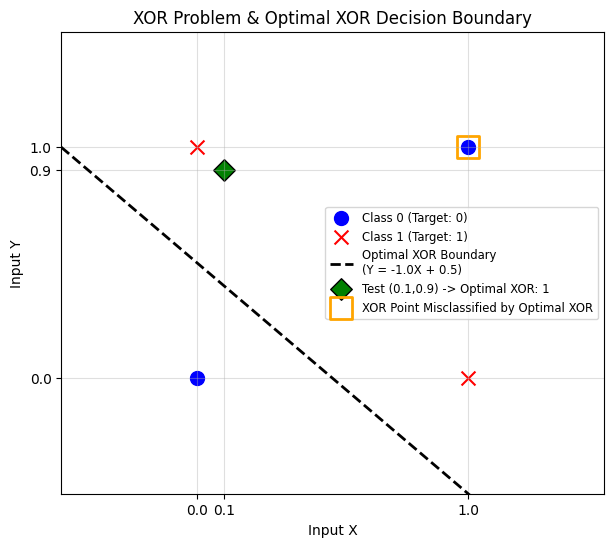

In [69]:
plt.figure(figsize=(7, 6))
class0_x = [X[i][0] for i in range(len(X)) if y[i] == 0]
class0_y = [X[i][1] for i in range(len(X)) if y[i] == 0]
class1_x = [X[i][0] for i in range(len(X)) if y[i] == 1]
class1_y = [X[i][1] for i in range(len(X)) if y[i] == 1]

plt.scatter(class0_x, class0_y, color='blue', marker='o', s=100, label='Class 0 (Target: 0)')
plt.scatter(class1_x, class1_y, color='red', marker='x', s=100, label='Class 1 (Target: 1)')

x_line_values = np.array([-0.5, 1.5])
if optimal_weights[1] != 0:
    y_line_values_trad = (-optimal_weights[0] * x_line_values - optimal_bias) / optimal_weights[1]
    plt.plot(x_line_values, y_line_values_trad, 'k--', linewidth=2,
             label=f'Optimal XOR Boundary\n(Y = {-optimal_weights[0]/optimal_weights[1]:.1f}X + {-optimal_bias/optimal_weights[1]:.1f})')
elif optimal_weights[0] != 0:
    x_boundary_trad = -optimal_bias / optimal_weights[0]
    plt.axvline(x_boundary_trad, color='k', linestyle='--', linewidth=2,
                label=f'Optimal XOR Boundary (X = {x_boundary_trad:.1f})')


plt.scatter(test_input[0], test_input[1], color='green', marker='D', s=120, edgecolor='black',
            label=f'Test ({test_input[0]},{test_input[1]}) -> Optimal XOR: {predicted_output}')


misclassified_x = [X[i][0] for i in range(len(X)) if optimal_predict(X[i], optimal_weights, optimal_bias)[1] != y[i]]
misclassified_y = [X[i][1] for i in range(len(X)) if optimal_predict(X[i], optimal_weights, optimal_bias)[1] != y[i]]
if misclassified_x:
    plt.scatter(misclassified_x, misclassified_y, facecolors='none', edgecolors='orange',
                s=250, linewidth=2, marker='s', label='XOR Point Misclassified by Optimal XOR')

plt.title('XOR Problem & Optimal XOR Decision Boundary')
plt.xlabel('Input X')
plt.ylabel('Input Y')
plt.xticks(sorted(list(set([0, 1, test_input[0]]))))
plt.yticks(sorted(list(set([0, 1, test_input[1]]))))
plt.xlim([-0.5, 1.5])
plt.ylim([-0.5, 1.5])
plt.grid(True, alpha=0.4)
plt.legend(fontsize='small')
plt.show()

## We can solve the limitations of single-layer perceptron to implement XOR by performing feature engineering

In [116]:
prelu_weights = np.array([1.0, -1.0])
prelu_bias = 0.0
prelu_a = -1

In [147]:
class SingleLayerPerceptron_prelu:
    def __init__(self, a_param, learning_rate=0.1, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = np.array([1.0, -1.0])
        self.bias = 0.0
        self.a_param = a_param

    def prelu_activation_abs(self, z):
        if self.a_param == -1:
            return np.abs(z)
        else:
            return np.where(z >= 0, z, self.a_param * z)

    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return weighted_sum, self.prelu_activation_abs(weighted_sum)

    def train(self, X, y):
        errors = []
        for _ in range(self.n_iterations):
            error_sum = 0
            for i in range(len(X)):
                # Forward pass
                prediction = self.predict(X[i])[1]

                # Calulate error
                error = y[i] - prediction
                error_sum += abs(error)

                # Update weights and bias
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

            errors.append(error_sum)
        return errors

In [149]:
prelu_perceptron = SingleLayerPerceptron_prelu(prelu_a, learning_rate=0.1, n_iterations=10000)
errors = prelu_perceptron.train(X, y)

correct_prediction = 0
print("\nFinal predictions:")
for i in range(len(X)):
    z_raw, raw_prelu = prelu_perceptron.predict(X[i])
    prediction = 1 if raw_prelu >= 0.5 else 0
    print(f"Input: {X[i]}, z = {z_raw}, Raw PReLU (|z|): {raw_prelu}, Target: {y[i]}, Prediction: {prediction}")
    if prediction == y[i]:
        correct_prediction += 1

print(f"Accuracy: {correct_prediction * 100 / 4.0}%")


Final predictions:
Input: [0 0], z = 0.0, Raw PReLU (|z|): 0.0, Target: 0, Prediction: 0
Input: [0 1], z = -1.0, Raw PReLU (|z|): 1.0, Target: 1, Prediction: 1
Input: [1 0], z = 1.0, Raw PReLU (|z|): 1.0, Target: 1, Prediction: 1
Input: [1 1], z = 0.0, Raw PReLU (|z|): 0.0, Target: 0, Prediction: 0
Accuracy: 100.0%


In [144]:
z_prelu_specific, raw_prelu_specific = prelu_perceptron.predict(test_input)
pred_prelu_specific = 1 if raw_prelu_specific>=0.5 else 0
print(f"Output for X={test_input[0]}, Y={test_input[1]} (XOR using PReLU):")
print(f"    z = ({test_input[0]}*{prelu_weights[0]}) + ({test_input[1]}*{prelu_weights[1]}) + ({prelu_bias}) = {z_prelu_specific:.2f}")
print(f"    Raw PReLU output (|z|): {raw_prelu_specific:.2f}")
print(f"    Final Predicted Output (thresholding raw at 0.5): {pred_prelu_specific}\n")

Output for X=0.1, Y=0.9 (XOR using PReLU):
    z = (0.1*1.0) + (0.9*-1.0) + (0.0) = -0.80
    Raw PReLU output (|z|): 0.80
    Final Predicted Output (thresholding raw at 0.5): 1



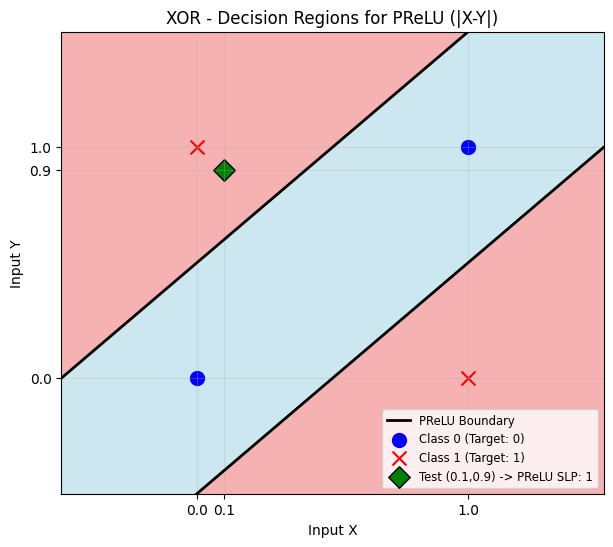

In [145]:
class0_x = X[y == 0, 0]
class0_y = X[y == 0, 1]
class1_x = X[y == 1, 0]
class1_y = X[y == 1, 1]

x_line_values = np.linspace(-0.5, 1.5, 100)

plt.figure(figsize=(7, 6))

x_contour = np.linspace(-0.5, 1.5, 200)
y_contour = np.linspace(-0.5, 1.5, 200)
X_contour, Y_contour = np.meshgrid(x_contour, y_contour)

Z_contour_weighted_sum = X_contour * prelu_perceptron.weights[0] + Y_contour * prelu_perceptron.weights[1] + prelu_perceptron.bias

Z_contour_output = prelu_perceptron.prelu_activation_abs(Z_contour_weighted_sum)

Z_decision = Z_contour_output >= 0.5

plt.contourf(X_contour, Y_contour, Z_decision, levels=[0, 0.5, 1], colors=['lightblue', 'lightcoral'], alpha=0.6)

plt.plot(x_line_values, x_line_values - 0.5, 'k-', linewidth=2, label='PReLU Boundary')
plt.plot(x_line_values, x_line_values + 0.5, 'k-', linewidth=2)

plt.scatter(class0_x, class0_y, color='blue', marker='o', s=100, label='Class 0 (Target: 0)')
plt.scatter(class1_x, class1_y, color='red', marker='x', s=100, label='Class 1 (Target: 1)')

plt.scatter(test_input[0], test_input[1], color='green', marker='D', s=120, edgecolor='black',
            label=f'Test ({test_input[0]},{test_input[1]}) -> PReLU SLP: {pred_prelu_specific}')

plt.title('XOR - Decision Regions for PReLU (|X-Y|)')
plt.xlabel("Input X")
plt.ylabel("Input Y")
plt.xticks(sorted(list(set([0, 1, test_input[0]])))) # Dynamic ticks
plt.yticks(sorted(list(set([0, 1, test_input[1]]))))
plt.xlim([-0.5, 1.5])
plt.ylim([-0.5, 1.5])
plt.grid(True, alpha=0.3)
plt.legend(loc='lower right', fontsize='small')
plt.show()